# **Clase 20**
## Límites y Escalamiento
PTUs y TPMs + API Management

## Objetivos de la clase

* Comprender cómo los límites y las cuotas del servicio de Azure OpenAI pueden impactar el funcionamiento de las aplicaciones basadas en IA generativa. 
* Entender cómo puedo diseñar arquitecturas que permitan escalar el uso de modelos de IA generativa en Microsoft Azure. 


## Introducción: Límites y Escalamiento 

En esta clase revisaremos mejores prácticas que nos permitan aumentar la capacidad de procesamiento de nuestras aplicaciones basadas en IA generativa. Para esto evaluaremos cómo  soportar el uso de los modelos de IA generativa a gran escala utilizando PTUs (Capacidad Reservada) y TPMs (Pago según Uso), junto con algunas recomendaciones de implementación.


### Generalidades 
La clave de entender cómo podemos escalar Azure OpenAI Service está en aprender a gestionar las cuotas asignadas al servicio. Por lo anterior, es importante que entendamos como funcionan los TPMs y los PTUs, ya que no solo nos permiten establecer el proceso de facturación sino que también nos definen los límites de las capacidades de un modelo desplegado.

#### TPMs, RPM y PTUs
* TPMs: TPM describe el número de Tokens por Minuto que puede recibir un modelo desplegado o la cantidad de Tokens por minuto máxima que tiene asignada una suscripción.

    [REF: Microsoft Learn](https://learn.microsoft.com/es-es/azure/ai-services/openai/how-to/quota?tabs=rest)
* RPM: la tasa de peticiones por minuto (Request-Per-Minute), no es un valor que influya directamente la facturación del servicio, pero sí está asociado a la asignación de TPMs. 

* PTUs: una PTU (Provisioned Throughput Units) establece una nueva forma para determinar las capacidades de un modelo desplegado a partir de los recursos reservados. Así, la suscripción de Azure permitirá establecer PTUs o reservas para cada modelo especifico, esto es, si se reservan 1000 PTUs para GPT 4, los PTUs reservados no se podrán usar para desplegar otro tipo de modelos. 

### ¿Por qué tengo que consideran los límites?
A medida que las organizaciones desarrollan soluciones basadas en IA generativa y sus usuarios empiezan a usarlas, se incrementa el número de tokens procesados por  los modelos hasta el punto que se logre llegar a alguno de los límites del servicio o modelos:
* Tokens por solicitud (prompt+completion) y cantidad de tokens asignados a los modelos desplegados.
* Cuota asignada para desplegar modelos de un tipo especifico en una región determinada.
* Máximo número de recursos de Azure OpenAI por región. 

### ¿Qué pasa si alcancé los límites?
Es probable que en algún momento alcancemos algun límite del servicio, sin embargo, debemos identificar podemos reducir la probabilidad de que esto ocurra monitoreando el uso del servicio y teniendo un plan para escalar, ya sea porque tenemos que procesar prompts y completions complejos o porque estamos llegando al límite de la cuota. 

Ante estas situaciones, podemos aplicar diferentes estrategias dependiendo del escenario
* Aumentar el número de tokens permitidos para el modelo
* Solicitar aumento de cuota del servicio  
* Si la cuota lo permite, desplegar más modelos en el mismo servicio 
* Si la cuota lo permite, desplegar más servicios de Azure OpenAI en la misma región
* Si la cuota lo permite, desplegar más servicios de Azure OpenAI en otras regiones
* Desplegar más servicios de Azure OpenAI en otras suscripciones

En la medida que aumentamos capacidad para procesar el número de tokens por minuto, se hace compleja la gestión de las llamadas a los modelos, ya que en algunos escenarios podríamos tener un gran número de APIs de Azure OpenAI por gestionar.

### Códigos de error: HTTP.

* 200: Se procesa el prompt exitosamente 
* 429: Error que se obtiene para Versiones 0613 que indica que el servidor está ocupado porque se ha alcanzado el límite de solicitudes. 
* 424: Error que se obtiene para Versiones 0301 que indica que el servidor está ocupado porque se ha alcanzado el límite de solicitudes.
* 408: Request timeout. El tiempo de espera de solicitud puede agotarse por problemas de conexión.
* 50x: Error interno del servicio. 
* 400: Error generado con el prompt, demasiado grande para el tipo de modelo.


## Actividad Límites

1. Desplegar un modelo GPT 3.5 turbo aplicando un límite de tokens por minuto diferente al establecido por defecto.

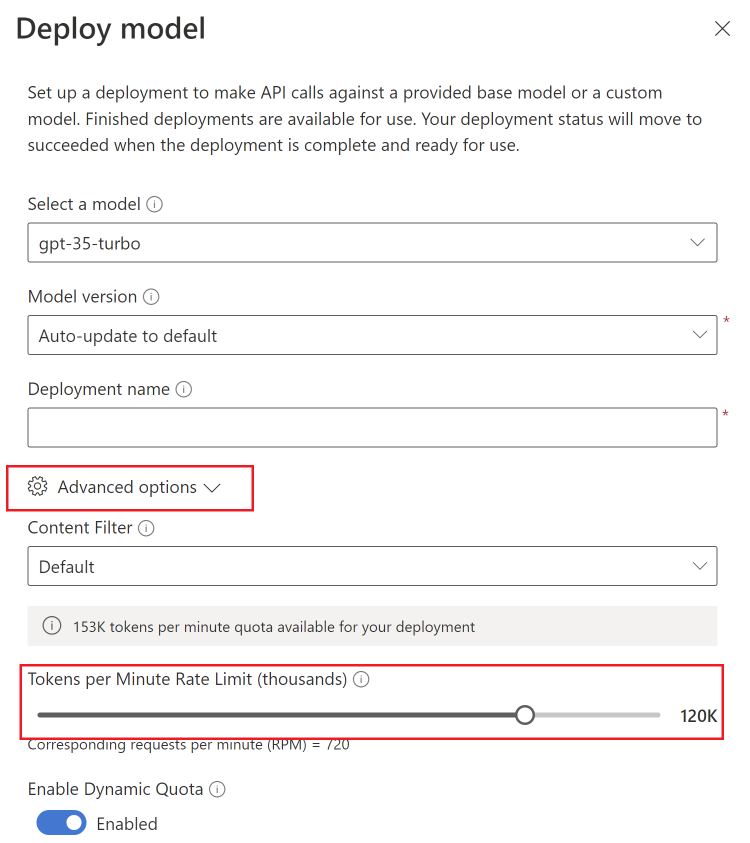

2. Usar el modelo desplegado en el punto anterior para enviar prompts que alcancen el límite de tokens por minuto. Hacer esto usando API REST o el SDK de python. 

3. Envíe el prompt del punto anterior al menos 20 veces y luego revise en Azure Portal el total de errores en la sección de métricas del servicio. 

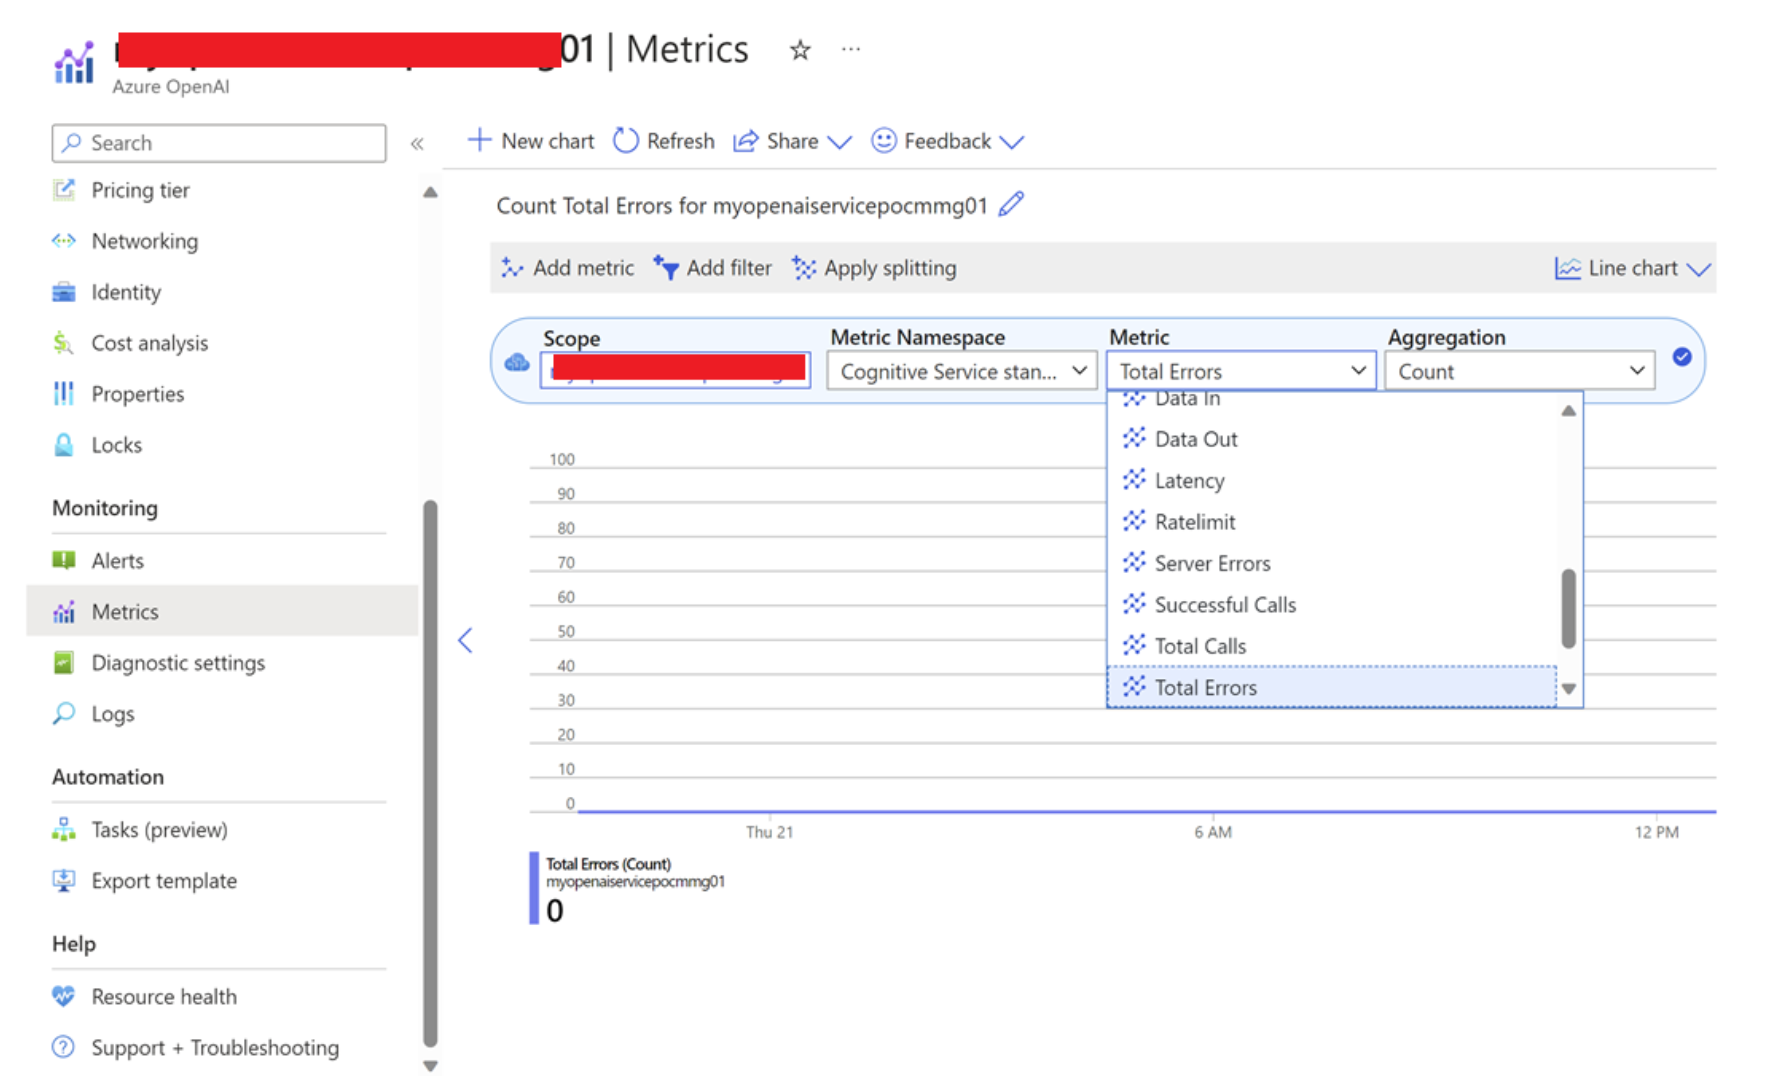

3. Seleccionar un tipo de modelo en la sección de cuotas, y desplegar modelos de este tipo (en el mismo servicio u otro) en una suscripción y región especifica, y desplegar varios modelos de este tipo de tal manera que se llegue al límite de la cuota. 

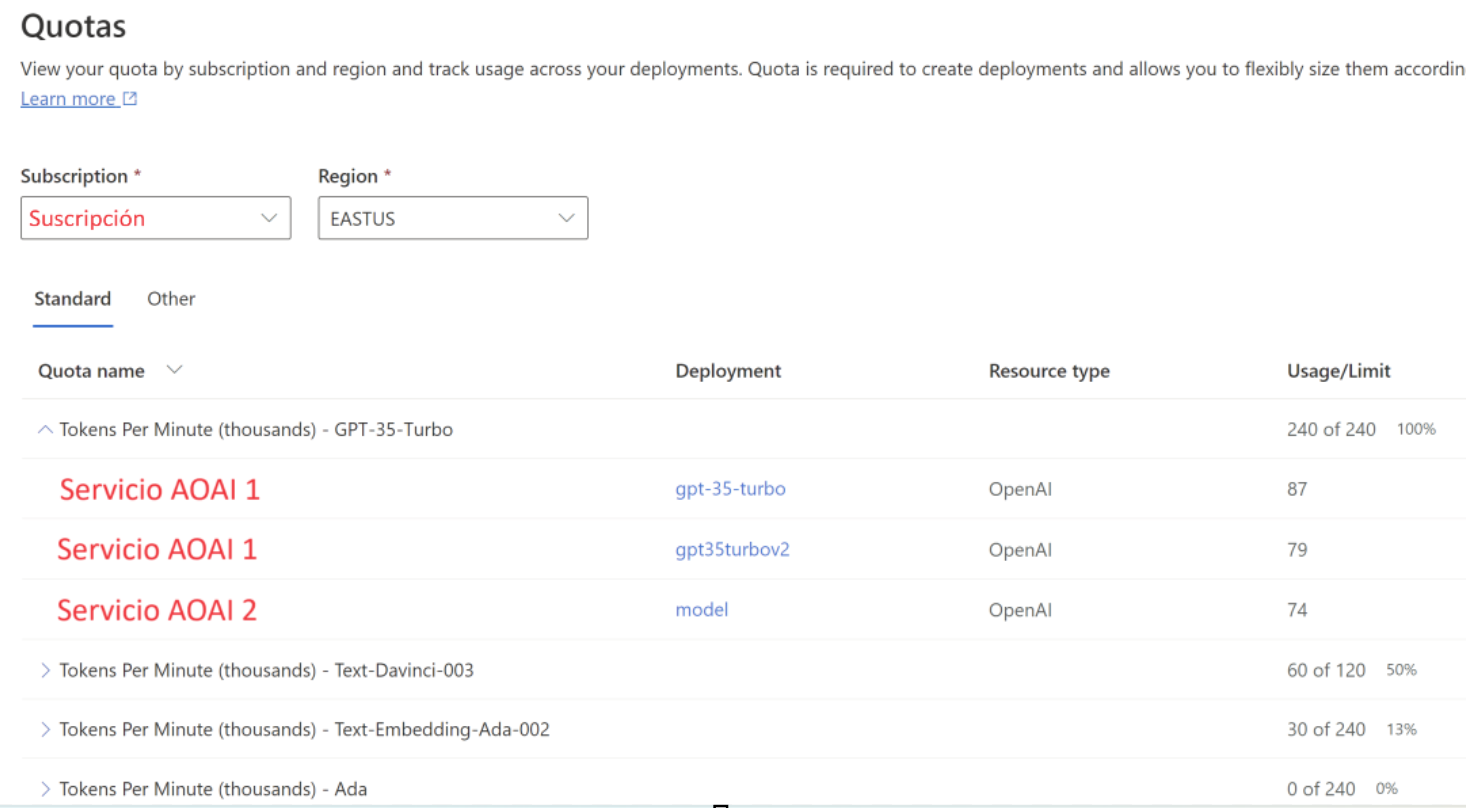

NOTA: La cuota se asigna por suscripción y región, por eso para validar si el límite de la cuota se ha alcanzado se suman todos los TPM asignados para todos los modelos de un mismo tipo en una misma suscripción y región.

4. Considerar el tipo de modelo que alcanzó al cuota en el punto anterior, intente desplegar un nuevo modelo de este tipo usando OpenAI Studio.

5. Intente desplegar n recursos de OpenAI Service. ¿Encontró un límite?



## 2. Escalamiento
Ahora que hemos aprendido a identificar situaciones que pueden generar errores en nuestros sistemas al  alcanzar los límites y cuotas en el servicio de Azure OpenAI, revisemos cómo podemos diseñar arquitecturas que intenten controlar estas situaciones con el fin de lograr sistemas más robustos.

Es claro que en sistemas empresariales una solución básica como incrementar el número de tokens que procesa un modelo en un minuto no siempre sería algo práctico, porque el número de usuarios y la complejidad de los prompts podría seguir creciendo o el uso del servicio podría tener un comportamiento dinámico. 

Considerando lo anterior, el despliegue de nuevos modelos en diferentes regiones o nuevos recursos de AOAI en la misma u otra suscripción podrían ayudar a paralizar la demanda de procesamiento, servir de backup cuando un modelo no está respondiendo o incluso de gestionar el reenvío de la petición después de haber superado algún problema de conexión. Sin embargo, la gestión por si sola de las APIs sería una tarea difícil de ejecutar con una implementación propia en el backend. 

Una de las herramientas que el ecosistema Azure nos provee para aumentar la capacidad de resilencia de las aplicaciones que dependen de APIs para su operación es API Management.

### ¿Qué es Azure API Management?

Azure API Management es una plataforma de gestión híbrida y multinube para APIs. Funciona como plataforma como servicio y admite todo el ciclo de vida de la API. Sus principales funciones son: 
* Abstrae la diversidad y complejidad de la arquitectura de backend de los clientes de las APIs.
* Expone de manera segura servicios alojados en Azure y fuera de él como APIs.
* Protege, acelera y observa las APIs.

[REF: Microsoft Learn](https://learn.microsoft.com/es-es/azure/api-management/api-management-key-concepts)

### ¿Cómo podemos usar API Management para gestionar PTUs y TPMs en Azure OpenAI?

#### Escalar: 1 región
Con API Mangement podemos soportar una arquitectura básica, donde se puede estar enviando prompts a modelos desplegados con configuraciones PTUs o TPMs de un recurso de AOAI, y luego, si excede los límites de PTU/TPM, enviar a otro servicio AOAI habilitado para PTU/TPM.

![arquitectura apimanagement.drawio.png](<attachment:arquitectura apimanagement.drawio.png>)

Una variación de esta arquitectura básica es que se podría diseñar un escenario dónde el modelo usado para la instancia principal de AOAI esté basado en PTUs, y cuando la capacidad provisionada se desborde, se pueda usar una segunda instancia basada en TPMs.

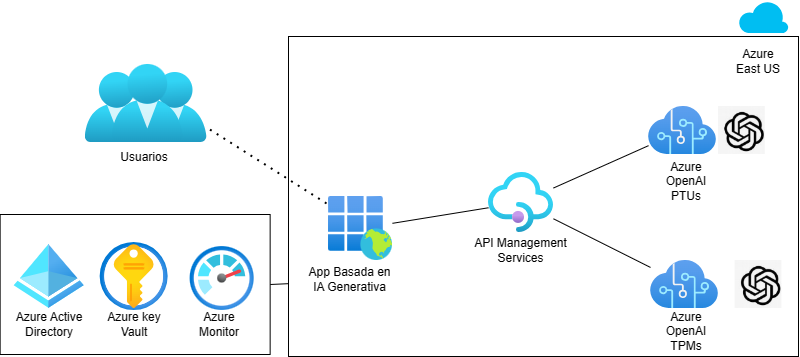


#### Escalar: 2/n regiones

Esta arquitectura considera una solución en la que enfrenta el problema de Cuota por región, ya que al habilitar instancias de AOAI en otras regiones, permite aumentar la cuota total a la que la solución podría acceder. 

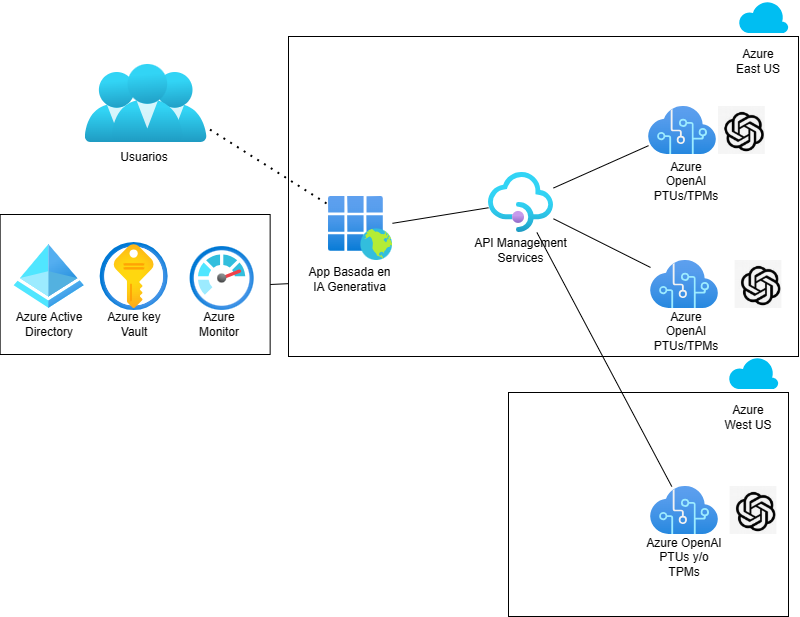

#### Escalar: 2/n suscripciones

Para abordar el problema de cuota por región se podría considerar el despliegue de recursos en diferentes suscripciones. Esto aumentaría considerablemente la cuota total de la solución.

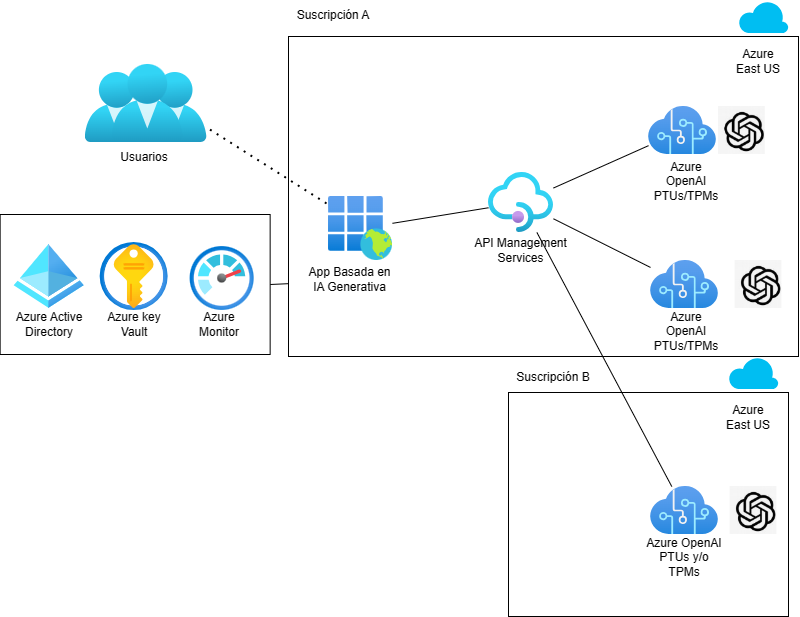

### Reintento - Retry Logic

Cuando implementamos soluciones basadas en API Management es necesario hacernos estas preguntas:
* ¿Cómo encolamos los mensajes al usar múltiples instancias (recursos) de Azure OpenAI? 
* ¿Cómo gestionamos los códigos de error de manera  eficiente para optimizar la experiencia de AOAI?

Como buena práctica del uso de API Management, se recomienda aprovechar el uso de lógica de reintento **(retry logic)** siempre que se utilice un servicio como AOAI. Con APIM, esto sería una tarea fácil de realizar, incluso si agregamos el concepto de reintento con retroceso exponencial se lograría un mejor rendimiento de la solución planteada. Los reintentos con retroceso exponencial implementan una técnica que reintenta una operación, con un tiempo de espera que aumenta exponencialmente, hasta que se haya alcanzado el número máximo de reintentos (el retroceso exponencial). 

Bajo la técnica del reintento exponencial se considera el hecho de que los recursos en la nube pueden estar intermitentemente no disponibles durante más de unos pocos segundos por cualquier motivo. Esto aplicado a un escenario dónde estamos utilizando AOAI, podríamos considerar que si se devuelve un error debido a un número excesivo de tokens por segundo (o RPM), API Management nos ayudaría a gestionar el error hasta que el modelo esté en la capacidad de responder correctamente. 



[REF: Microsoft Learn](https://learn.microsoft.com/es-es/azure/api-management/retry-policy)


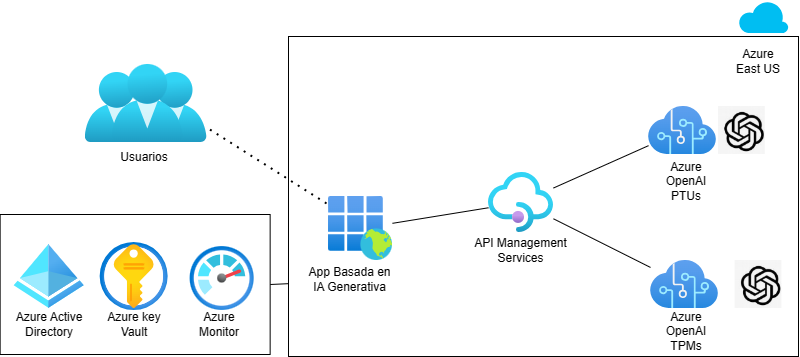


## Práctica escalamiento

1. Implemente la arquitectura 1, usando TPMs en ambas instancias de Azure OpenAI y realice la respectiva configuración de la política de **retry logic**.

    **Bonus:** Utilizar un modelo de GPT 4 vision para describir las arquitecturas 1, 2 y 3. 

# Conclusiones 

En esta clase aprendimos sobre cómo los límites del servicio de Azure OpenAI podrían limitar nuestras soluciones basadas en IA generativa y también revisamos cómo algunas arquitecturas basadas en API Management nos ayudarían a dar manejo a estos límites. Considera  situaciones en las que tu solución debería incrementar la capacidad de procesamiento de tokens y define cuál solución abordaría mejor tu problema. 